In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


set up and and load data

1- install depencies ans setups

In [82]:
!pip install tensorflow-gpu opencv-python matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

# opencv is to remove dodgy images   python matplotlib is to visualise that images

In [8]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
os.path.join('data','happy')

'data/happy'

In [85]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True) #limit to use all the memory

RuntimeError: Physical devices cannot be modified after being initialized

Remove dodgy images : images can be mislabled

In [10]:
import cv2
import imghdr

In [11]:
os.listdir(data_dir)

NameError: name 'data_dir' is not defined

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data_dir = '/content/drive/My Drive/data'

In [14]:
image_exts=['jpeg','jpg','bmp','png']

In [90]:
image_exts[0]

'jpeg'

In [15]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)


image18.jpeg
image21.jpeg
image22.png
image10.jpeg
image13.jpeg
image20.jpeg
image12.jpeg
image.jpeg
image2.jpeg
image16.jpeg
image7.jpeg
image9.jpeg
image11.jpeg
image14.jpeg
image3.jpeg
image6.jpeg
image15.jpeg
image4.jpeg
image19.jpeg
image8.jpeg
image17.jpeg
image5.jpeg
happy-people-3.jpg
friends-youth-happy-people-cartoon-W80EC5.jpg
Joyful-Happy-People-1.jpg
images.jpg
happy-people-2.jpg
960x0.jpg
bigstock-enjoy-freedom-26443526-1-300x201.jpg
mats--rejoicing-man-running-woman-girl-profession-pack-illustrations-3613847.png
images3.jpg
Happy.jpg
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
getty_478389113_970647970450091_99776.jpg
images2.jpg
getty_505175324_2000131020009280246_158016.jpg
png-clipart-business-service-marketing-happy-people-tshirt-service-thumbnail.png
hand-drawn-happy-people-jumping_23-2149092878.jpg
img.jpg
png-transparent-graphy-happiness-people-happy-people-photography-people-team-thumbnail.png
group-happy-people-party-isolated-white-background-31666248.jpg
-in-svg-png-g

In [16]:
print(cv2.imread(os.path.join(data_dir,'happy','56f455011e0000b300705475.jpeg')))

[[[230 242 248]
  [230 242 248]
  [230 242 248]
  ...
  [ 35  36  50]
  [ 32  33  47]
  [ 33  33  47]]

 [[230 242 248]
  [230 242 248]
  [230 242 248]
  ...
  [ 34  36  47]
  [ 32  34  45]
  [ 32  32  44]]

 [[230 242 248]
  [230 242 248]
  [230 242 248]
  ...
  [ 33  35  46]
  [ 31  33  44]
  [ 32  32  44]]

 ...

 [[172 190 173]
  [175 192 178]
  [176 193 180]
  ...
  [ 15  12   8]
  [  5   2   0]
  [ 22  17  14]]

 [[173 192 173]
  [176 194 177]
  [176 194 177]
  ...
  [ 10   7   3]
  [ 10   7   3]
  [ 15  10   7]]

 [[174 193 174]
  [176 195 176]
  [177 195 178]
  ...
  [ 10   7   3]
  [ 19  16  12]
  [  8   3   0]]]


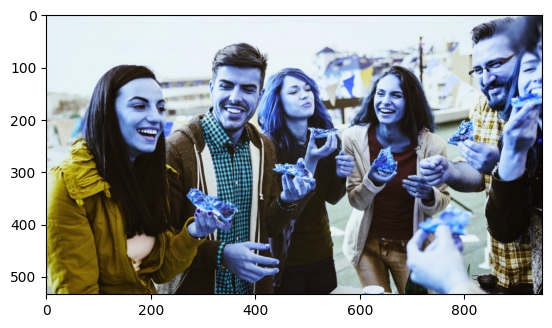

In [17]:
plt.imshow(cv2.imread(os.path.join(data_dir,'happy','56f455011e0000b300705475.jpeg')))
plt.show()

In [18]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

load Data

In [25]:
tf.data.Dataset??

In [19]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 210 files belonging to 2 classes.


The function tf.keras.utils.image_dataset_from_directory automatically loads images from a directory structure where each subdirectory represents a class label. It returns an object of type tf.data.Dataset, which is a dataset object that TensorFlow can efficiently work with for training, validation, and testing.

In [20]:
data_iterator=data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7e10e7aedea0>)

In [117]:
tf.keras.utils.image_dataset_from_directory??


In [21]:
batch=data_iterator.next()

Purpose of Each Step
Why Load as Dataset: Using image_dataset_from_directory simplifies loading images and automatically labels them based on folder structure, which is ideal for preparing data for model training.
Why Convert to NumPy Iterator: Converting to a NumPy iterator makes it easier to manually inspect batches, which is useful for debugging or understanding your data before model training.
Why Retrieve Batch with .next(): Fetching a batch with .next() allows you to inspect the actual data (images and labels) within the batch, confirming the data’s structure and content.

In [22]:
batch

(array([[[[2.24000000e+02, 2.37000000e+02, 2.45000000e+02],
          [2.24000000e+02, 2.37000000e+02, 2.45000000e+02],
          [2.24000000e+02, 2.37000000e+02, 2.45000000e+02],
          ...,
          [1.99937500e+02, 2.20937500e+02, 2.39937500e+02],
          [1.98257812e+02, 2.19257812e+02, 2.38257812e+02],
          [1.98257812e+02, 2.19257812e+02, 2.38257812e+02]],
 
         [[2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
          [2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
          [2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
          ...,
          [2.00725098e+02, 2.21725098e+02, 2.40725098e+02],
          [1.99000000e+02, 2.20000000e+02, 2.39000000e+02],
          [1.99000000e+02, 2.20000000e+02, 2.39000000e+02]],
 
         [[2.26000000e+02, 2.39000000e+02, 2.47000000e+02],
          [2.25437500e+02, 2.38437500e+02, 2.46437500e+02],
          [2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
          ...,
          [2.00000000e+02, 2.21000000e+02, 2.4000

In [23]:
len(batch)

2

In [24]:
batch[0]

array([[[[2.24000000e+02, 2.37000000e+02, 2.45000000e+02],
         [2.24000000e+02, 2.37000000e+02, 2.45000000e+02],
         [2.24000000e+02, 2.37000000e+02, 2.45000000e+02],
         ...,
         [1.99937500e+02, 2.20937500e+02, 2.39937500e+02],
         [1.98257812e+02, 2.19257812e+02, 2.38257812e+02],
         [1.98257812e+02, 2.19257812e+02, 2.38257812e+02]],

        [[2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
         [2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
         [2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
         ...,
         [2.00725098e+02, 2.21725098e+02, 2.40725098e+02],
         [1.99000000e+02, 2.20000000e+02, 2.39000000e+02],
         [1.99000000e+02, 2.20000000e+02, 2.39000000e+02]],

        [[2.26000000e+02, 2.39000000e+02, 2.47000000e+02],
         [2.25437500e+02, 2.38437500e+02, 2.46437500e+02],
         [2.25000000e+02, 2.38000000e+02, 2.46000000e+02],
         ...,
         [2.00000000e+02, 2.21000000e+02, 2.40000000e+02],
         [

In [25]:
batch[1]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [26]:
batch[0].shape

(32, 256, 256, 3)

In [27]:
batch[1].shape

(32,)

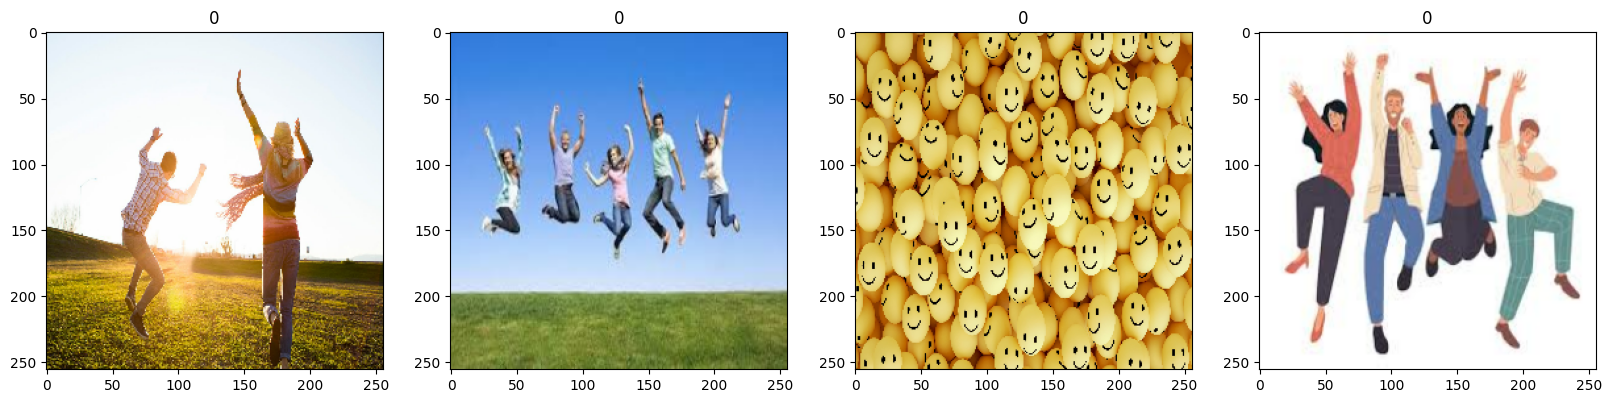

In [28]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

happy people =0
sad people =1

preprocessing : scaling the image between 0 and 1
spliting the data

scale data

In [29]:
scaled=batch[0]/255

In [30]:
scaled.min()

0.0

In [31]:
scaled.max()

1.0

In [32]:
data=data.map(lambda x,y: (x/255,y))
# x represent the images and y represent the labels

split the data

In [33]:
scaled_iterator=data.as_numpy_iterator()

In [34]:
batch=scaled_iterator.next()

In [35]:
batch[0].min()

0.0

In [36]:
batch[0].max()

1.0

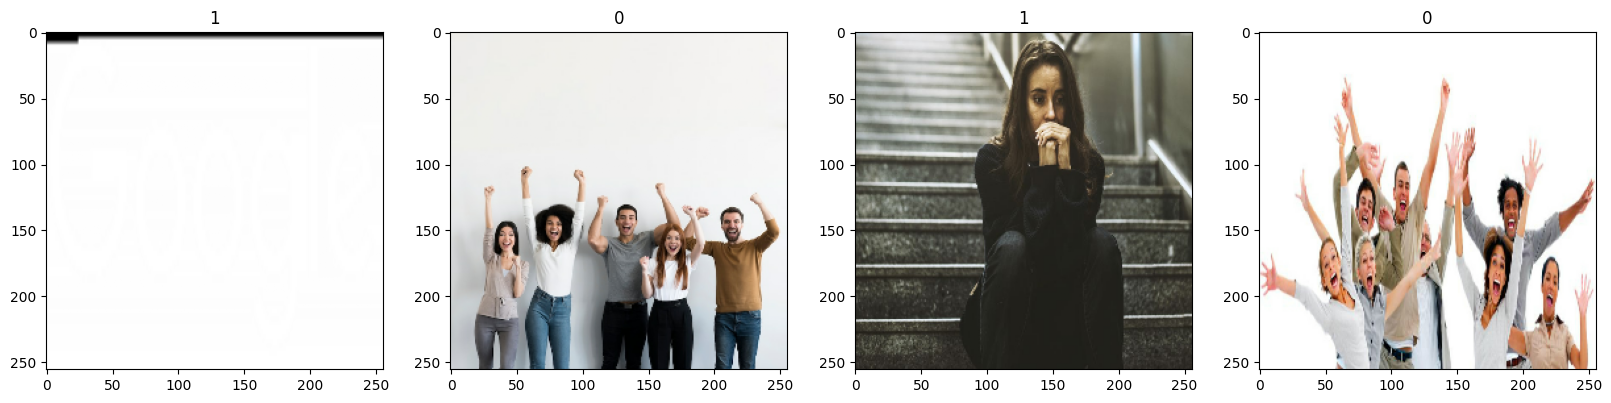

In [37]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

split data

In [38]:
len(data)

7

we gave 7 batches

In [39]:
train_size=int(len(data)*.7)   #70%
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [40]:
print(train_size)
print(val_size)
print(test_size)

4
2
1


In [41]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)
print(train)
print(val)
print(test)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Deep Model

In [42]:
len(test)

1

building are deep learning model

In [43]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [44]:
model=Sequential()

In [45]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Effect on Downsampling: Using a larger stride can downsample the feature map more aggressively, reducing its spatial dimensions quickly. This can help in reducing the computational complexity of the model and extracting more abstract features at higher layers.

In [46]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

train

In [48]:
logdir='logs'

What is logdir='logs'?
Log Directory: When you set logdir='logs', you’re telling your program, “Please save all the training information in a folder named logs.”
Why Do We Use It?
Keep Track of Training:

During training, you want to monitor how well your model is learning. The logdir is where all that information (like how much the model's accuracy improves) gets saved.
Visualize with TensorBoard:

After training, you can use a tool called TensorBoard to visualize the training process. By pointing TensorBoard to the logs folder, it knows where to find the information to show you graphs and charts.

In [49]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4792 - loss: 0.9218 - val_accuracy: 0.6719 - val_loss: 0.6638
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5510 - loss: 0.6580 - val_accuracy: 0.6406 - val_loss: 0.5647
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5948 - loss: 0.6102 - val_accuracy: 0.6250 - val_loss: 0.5324
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.7094 - loss: 0.5148 - val_accuracy: 0.6094 - val_loss: 0.6452
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6708 - loss: 0.6486 - val_accuracy: 0.8438 - val_loss: 0.4182
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8594 - loss: 0.4203 - val_accuracy: 0.9062 - val_loss: 0.3935
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8917 - loss: 0.3777 - val_accuracy: 0.9375 - val_loss: 0.2120
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9115 - loss: 0.2465 - val_accuracy: 0.9375 - val_loss: 0.1651
Epoch 9/

Step-by-Step: What Happens During Training with Validation
Let's go through what happens in a single epoch (one complete pass through the training data) to understand how training and validation are used.

Start of Training Epoch:

The model begins a new epoch. This means it will go through all the training data once.
Training on Each Batch:

The model takes a small batch of data from the training set.
It uses this batch to:
Make predictions.
Compare predictions to the actual labels (answers).
Calculate loss (how far off the predictions were).
Update parameters to improve performance.
This process repeats for each batch in the training set until the entire training set has been used.
End of Training Epoch:

After the model has seen all the training data once (completing one epoch), it temporarily pauses to check its performance on the validation set.
Validation Step:

The model now uses the validation set to evaluate how well it has learned.
It goes through the validation data without adjusting any parameters (no training happens here).
It calculates a validation loss and validation accuracy to measure how well it’s performing on data it hasn't seen before.
This validation performance gives an indication of how well the model might perform on new, unseen data.
Feedback from Validation:

The training process looks at the validation loss:
If validation loss decreases (meaning the model is improving on validation data), this suggests that training is effective.
If validation loss starts to increase while training loss keeps decreasing, this is a sign of overfitting (the model is learning the training data too well but failing to generalize to new data).
Based on this feedback, you might decide to:
Stop training early if overfitting occurs (this is called early stopping).
Continue training if the model is improving on both training and validation data.
Next Epoch:

The model begins another epoch, repeating the same process:
Train on the training set, batch by batch.
Check performance on the validation set at the end of each epoch.
Summary
Training Set: The model learns from this data by adjusting its parameters.
Validation Set: The model’s performance is evaluated on this data after each epoch to check if it's learning properly.
Why Use Validation: It tells us if the model is overfitting, improving, or underperforming, so we can make adjustments during training if needed.
The validation set is not part of training; it’s only used to measure the model’s progress and generalizability at the end of each epoch. This helps ensure that the model learns patterns that will work on new data, rather than just memorizing the training data.

If you still have questions, feel free to ask for more details on any part of this process!

In [51]:
hist.history

{'accuracy': [0.4609375,
  0.53125,
  0.6875,
  0.75,
  0.734375,
  0.8515625,
  0.8828125,
  0.8984375,
  0.9453125,
  0.9453125,
  0.9609375,
  0.9453125,
  0.9609375,
  0.9765625,
  1.0,
  0.984375,
  0.9765625,
  0.9921875,
  1.0,
  0.9921875],
 'loss': [1.0147608518600464,
  0.6525234580039978,
  0.5796846747398376,
  0.4931368827819824,
  0.5630198121070862,
  0.4271111786365509,
  0.35173240303993225,
  0.25837087631225586,
  0.16214238107204437,
  0.13402175903320312,
  0.12056488543748856,
  0.1182975322008133,
  0.09547798335552216,
  0.07272399961948395,
  0.03255357965826988,
  0.04657336696982384,
  0.041617389768362045,
  0.024990536272525787,
  0.01393454521894455,
  0.03262924775481224],
 'val_accuracy': [0.671875,
  0.640625,
  0.625,
  0.609375,
  0.84375,
  0.90625,
  0.9375,
  0.9375,
  0.921875,
  0.921875,
  0.9375,
  0.953125,
  1.0,
  1.0,
  1.0,
  0.984375,
  0.96875,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6637811064720154,
  0.5647163391113281,
  0.532368242740

plot perfomance

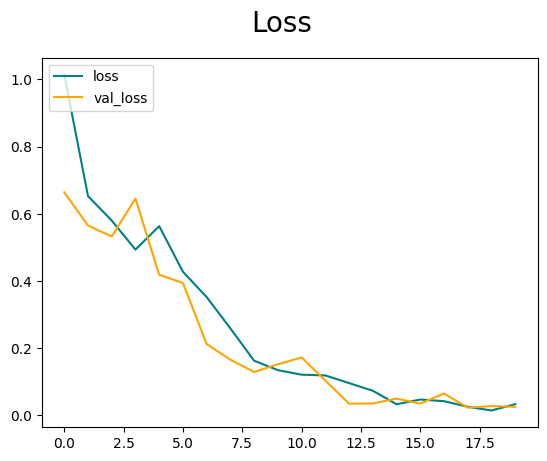

In [52]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

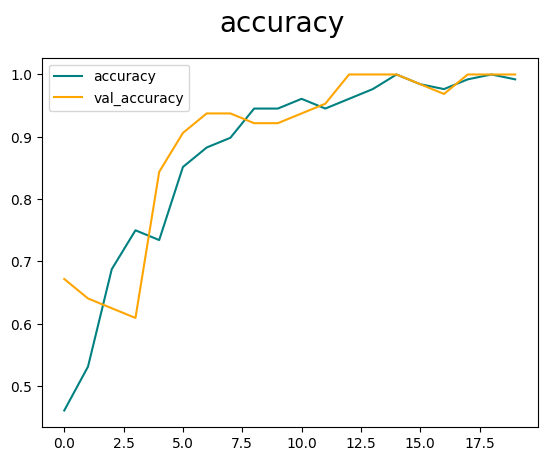

In [55]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

evaluate the performance

In [56]:
#evaluate
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy


In [57]:
pre= Precision()
re= Recall()
acc= BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


In [59]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


Test  

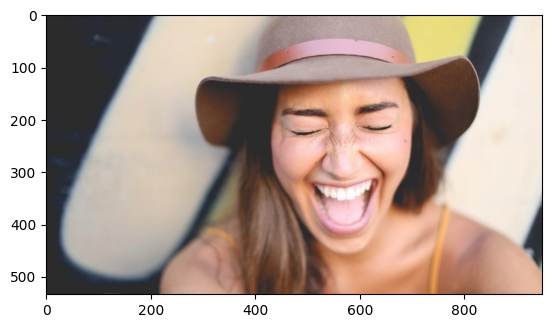

In [63]:
img=cv2.imread('happy2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

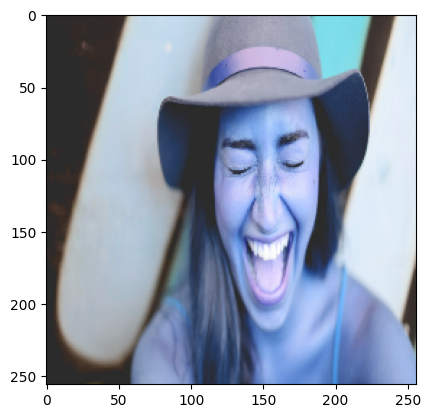

In [67]:
resize = tf.image.resize(img, (256, 256))  # Resizes the image to 256x256
plt.imshow(resize.numpy().astype(int))# Converts to RGB and displays
plt.show()  # Shows the image


In [68]:
np.expand_dims(resize/255,0)

array([[[[0.17924327, 0.16862746, 0.16470589],
         [0.19582058, 0.1648348 , 0.16470589],
         [0.16862746, 0.16862746, 0.16862746],
         ...,
         [0.8539905 , 0.90889245, 0.9559513 ],
         [0.84705883, 0.9019608 , 0.9490196 ],
         [0.8535156 , 0.9084176 , 0.9554764 ]],

        [[0.17431065, 0.16862746, 0.16717218],
         [0.18576899, 0.16616115, 0.16717218],
         [0.16862746, 0.16862746, 0.16862746],
         ...,
         [0.8539905 , 0.90889245, 0.9559513 ],
         [0.84337467, 0.8982766 , 0.9453355 ],
         [0.8535156 , 0.9084176 , 0.9554764 ]],

        [[0.17140013, 0.16862746, 0.16862746],
         [0.17613113, 0.16862746, 0.16862746],
         [0.16862746, 0.16862746, 0.16862746],
         ...,
         [0.85464203, 0.909544  , 0.9566028 ],
         [0.84705883, 0.9019608 , 0.9490196 ],
         [0.85490197, 0.9098039 , 0.95686275]],

        ...,

        [[0.16862746, 0.16862746, 0.16862746],
         [0.16862746, 0.16862746, 0.16862746]

In [69]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [70]:
yhat

array([[0.3553739]], dtype=float32)

In [71]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


save the model

In [77]:
from tensorflow.keras.models import load_model


In [78]:
model.save(os.path.join('models','happysadmodel.h5'))

In [79]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [80]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [81]:
if yhatnew > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')=

Predicted class is Happy
